In [1734]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


In [1735]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


In [1736]:
data_copy = data.copy()
X = data_copy['x1']
y = data_copy['y']

In [1737]:
print(X)

0     -0.887890
1      0.402109
2     -0.114545
3      0.832631
4      0.318175
         ...   
995    0.401581
996    0.859591
997    0.990358
998   -0.498523
999    0.596445
Name: x1, Length: 1000, dtype: float64


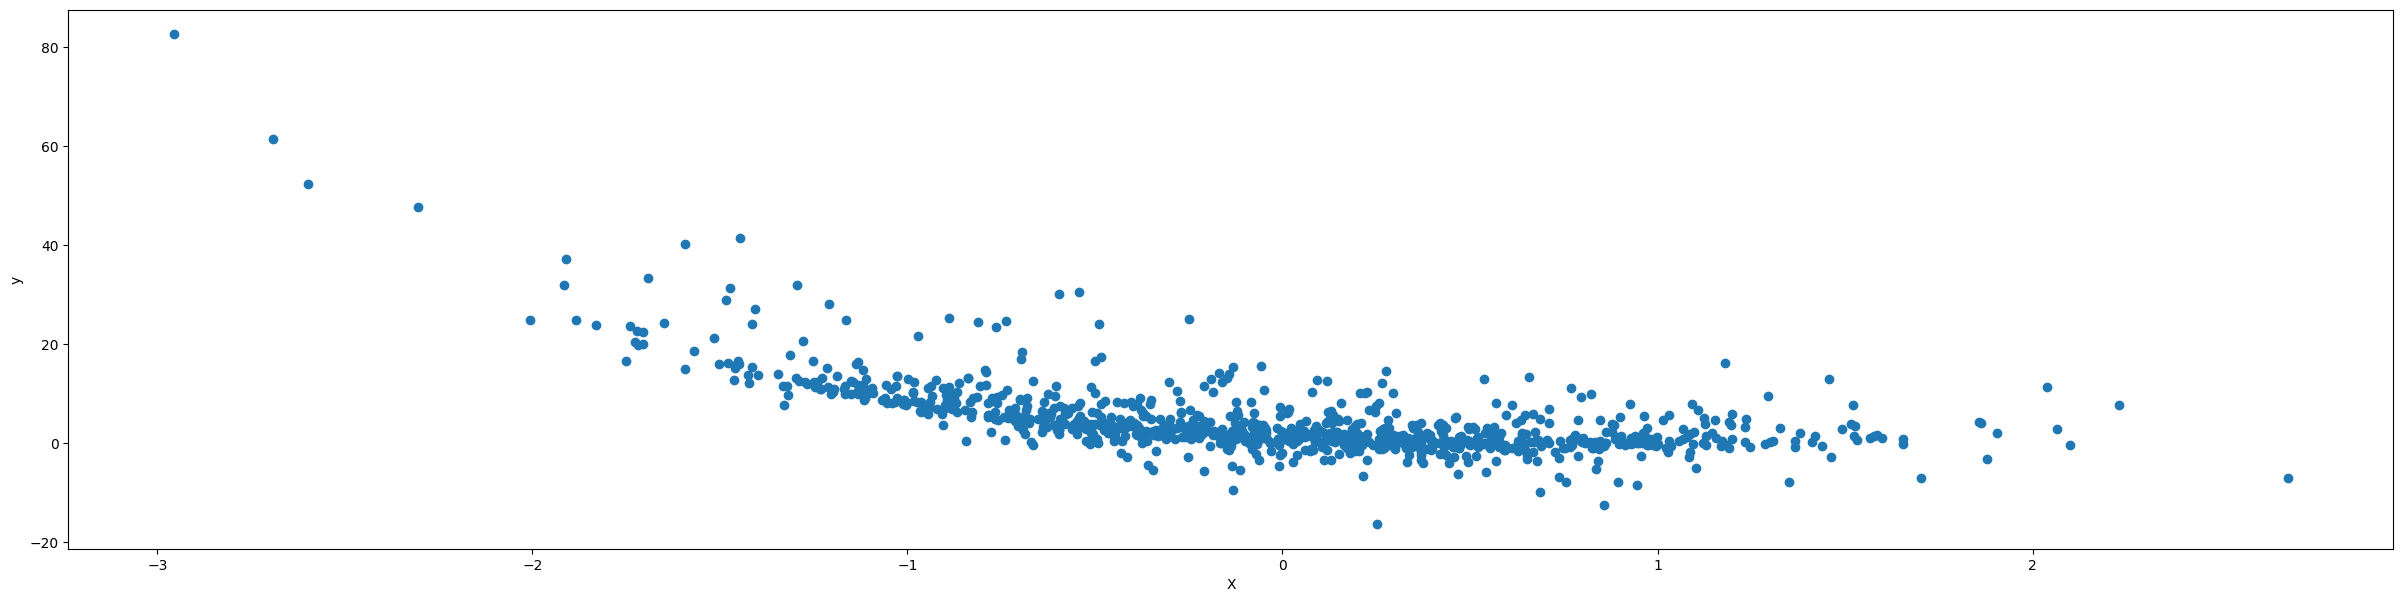

In [1738]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [1739]:
splitter = int(0.8 * len(X))
X_train, X_test = X[:splitter], X[splitter:]
y_train, y_test = y[:splitter], y[splitter:]

print(f"Input Train: {X_train.shape}")
print(f"Input Test: {X_test.shape}")
print(f"Output Train: {y_train.shape}")
print(f"Output Test: {y_test.shape}")

Input Train: (800,)
Input Test: (200,)
Output Train: (800,)
Output Test: (200,)


In [1740]:
X_test=torch.tensor(X_test.values)
y_test=torch.tensor(y_test.values)
X_train=torch.tensor(X_train.values)
y_train=torch.tensor(y_train.values)


In [1741]:
import matplotlib.pyplot as plt

def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

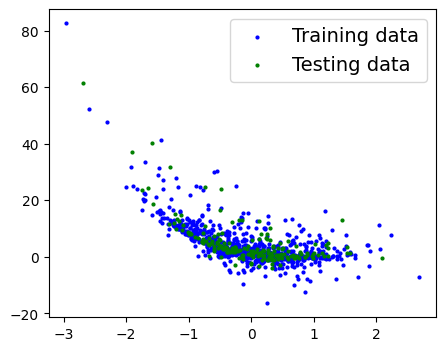

In [1742]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [1743]:
import torch
import torch.nn as nn
class PolynomialRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.p1 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p2 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p3 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p4 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p5 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True, 
                                                dtype=torch.float32))
        self.p6 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.p7 = nn.Parameter(torch.rand( 1,
                                                requires_grad=True,
                                                dtype=torch.float32))
    def forward(self, x): 
        return self.p1*x**6 + self.p2*x**5 + self.p3*x**4 + self.p4*x**3 + self.p5*x**2 + self.p7*x + self.p7

In [1744]:
def divider():
    print("-----------------------------------")
torch.manual_seed(42)
model_1 = PolynomialRegressionModel()
list(model_1.parameters())
divider()
print(model_1.state_dict())

-----------------------------------
OrderedDict([('p1', tensor([0.8823])), ('p2', tensor([0.9150])), ('p3', tensor([0.3829])), ('p4', tensor([0.9593])), ('p5', tensor([0.3904])), ('p6', tensor([0.6009])), ('p7', tensor([0.2566]))])


In [1745]:
with torch.inference_mode():
    
    y_preds = model_1(X_test)

print(f"Values: {y_preds}")

Values: tensor([ 1.5157e-01,  6.0350e+00,  9.3288e-02,  2.5341e-01,  2.5731e-01,
         2.0235e-01,  5.5236e-01,  9.5935e+00,  3.0952e-01,  4.6009e-01,
         2.0686e+01,  2.9514e-01,  1.6468e-01,  1.7562e+00, -1.0841e-01,
         1.2726e+00,  3.4962e-01,  6.8351e-01,  3.9812e+00, -1.7810e-01,
         6.1548e-01,  2.5983e-01,  3.6861e-01,  7.0988e-01,  1.5139e-01,
         5.5721e-01, -4.1679e-02,  2.0517e-01,  2.9855e-01, -2.1595e-01,
         3.2609e-01,  3.1800e-01,  4.1275e-01,  4.0059e+00,  3.5612e-02,
         2.6232e-01,  2.3927e+00,  9.5578e+00,  6.5645e+00,  3.3427e-01,
        -1.8529e-01,  6.1616e-01,  4.5457e-01, -7.3692e-02,  4.0085e-01,
         2.3181e-01,  9.4040e-02, -7.4011e-02,  4.4300e-01,  1.2687e-01,
         2.0205e-01,  3.5554e+00,  3.3115e-02,  1.3496e-01, -9.0337e-02,
        -1.6077e-01, -4.9424e-02,  4.4572e+00,  9.9662e-02, -2.1035e-01,
         2.5604e-01,  3.4923e-03,  1.6214e-01,  2.5781e-01,  1.2423e+00,
         1.9053e-01,  6.0969e-02,  4.2980e-

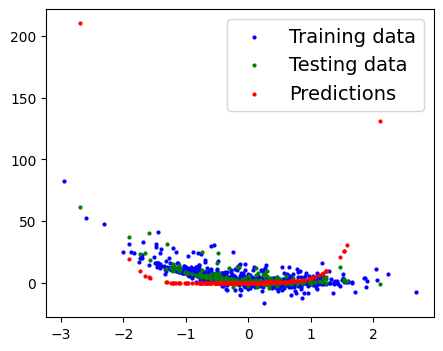

In [1746]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [1747]:
import torch.optim as optim
# Define the loss function and the optimizer
loss_fn = nn.L1Loss()
# learning_rate = 0.0001
learning_rate = 0.00001   # reduce the learning rate for stability
# add momentum to SGD to speed up training dramatically
optimizer = torch.optim.SGD(params = model_1.parameters(), 
                            lr = learning_rate, momentum = 0.99)


In [1748]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int = 10,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs):
        model.train()
        train_data= torch.tensor(train_data)
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            test_data=torch.tensor(test_data)
            
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [1749]:
epochs_count, train_loss, test_loss = train (
                                        model_1, 
                                       
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                    
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_fn, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\1379420032.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data= torch.tensor(train_data)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\1379420032.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data=torch.tensor(test_data)


Epoch 0: MAE Loss: 7.41 | Test Loss: 6.12
Epoch 10: MAE Loss: 7.41 | Test Loss: 6.12
Epoch 20: MAE Loss: 7.40 | Test Loss: 6.12
Epoch 30: MAE Loss: 7.39 | Test Loss: 6.11
Epoch 40: MAE Loss: 7.37 | Test Loss: 6.09
Epoch 50: MAE Loss: 7.36 | Test Loss: 6.08
Epoch 60: MAE Loss: 7.33 | Test Loss: 6.06
Epoch 70: MAE Loss: 7.31 | Test Loss: 6.03
Epoch 80: MAE Loss: 7.28 | Test Loss: 6.01
Epoch 90: MAE Loss: 7.25 | Test Loss: 5.99
Epoch 100: MAE Loss: 7.22 | Test Loss: 5.96
Epoch 110: MAE Loss: 7.19 | Test Loss: 5.93
Epoch 120: MAE Loss: 7.16 | Test Loss: 5.90
Epoch 130: MAE Loss: 7.12 | Test Loss: 5.87
Epoch 140: MAE Loss: 7.09 | Test Loss: 5.84
Epoch 150: MAE Loss: 7.05 | Test Loss: 5.81
Epoch 160: MAE Loss: 7.01 | Test Loss: 5.77
Epoch 170: MAE Loss: 6.97 | Test Loss: 5.74
Epoch 180: MAE Loss: 6.93 | Test Loss: 5.70
Epoch 190: MAE Loss: 6.90 | Test Loss: 5.67
Epoch 200: MAE Loss: 6.86 | Test Loss: 5.63
Epoch 210: MAE Loss: 6.82 | Test Loss: 5.60
Epoch 220: MAE Loss: 6.79 | Test Loss: 5.56

In [1750]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

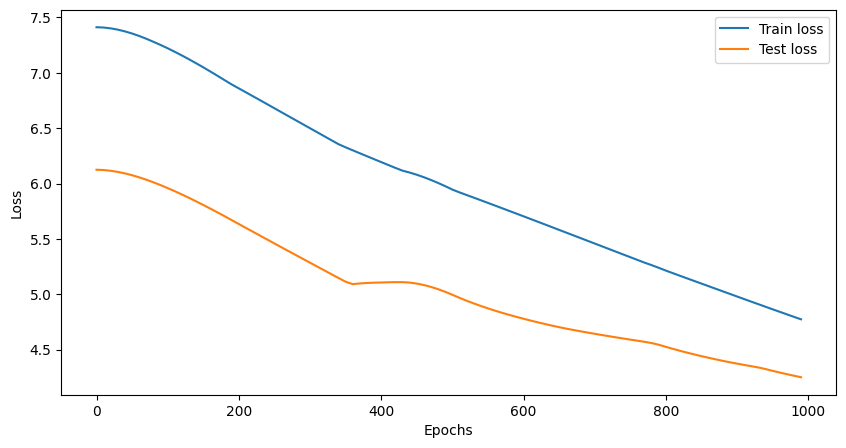

In [1751]:
plot_stats(epochs_count, train_loss, test_loss)

In [1752]:
def predict(model_1, X):
    with torch.inference_mode():
        y_preds = model_1(X)
        return y_preds

In [1753]:
y_preds = predict(model_1, X_test)
y_preds

tensor([ 0.1685,  4.7446,  0.1934,  0.1720,  0.1746,  0.1559,  0.3877,  2.5251,
         0.2145,  0.3271,  3.8942,  0.2031,  0.1641,  0.9178,  1.0187,  0.7402,
         0.2461,  0.4652,  1.5199,  0.4531,  0.4261,  0.1763,  0.2607,  0.4798,
         0.1686,  0.3908,  0.2800,  0.1557,  0.2058,  0.5874,  0.2277,  0.2213,
         0.2936,  1.5254,  0.2250,  0.1781,  1.1168,  2.5197,  2.0336,  0.2341,
         0.8445,  0.4265,  0.3233,  0.3086,  0.2849,  0.1603,  0.1931,  0.3089,
         0.3152,  0.1782,  0.1559,  1.4211,  0.2265,  0.1748,  0.3254,  0.9104,
         0.2866,  4.0348,  0.1904,  0.5522,  0.1737,  0.2458,  0.1649,  0.1749,
         0.7280,  0.1574,  0.2103,  0.3059,  0.2259,  0.1561,  0.1557,  0.2158,
         0.2317,  0.2071,  0.3513,  0.1903,  0.1812,  0.1559,  0.1998,  0.1559,
         1.2534,  0.2698,  2.3122,  0.1653,  4.3993,  0.1663,  0.2551,  0.1662,
         0.1795,  0.3212,  0.1577,  0.1582,  0.5708,  2.5374,  0.1810,  0.1560,
         0.2620,  0.2860,  0.1576,  1.14

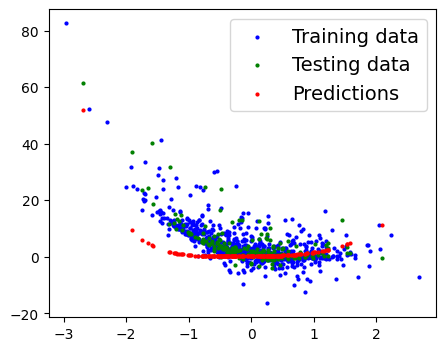

In [1754]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [1755]:

data_copy = data.copy()
X = data_copy['x2']
y = data_copy['y']

In [1756]:
print(X)

0      0.949137
1     -0.109812
2     -1.603722
3      0.443724
4     -0.042458
         ...   
995    0.133351
996    0.184304
997   -0.118427
998   -2.075085
999    1.099576
Name: x2, Length: 1000, dtype: float64


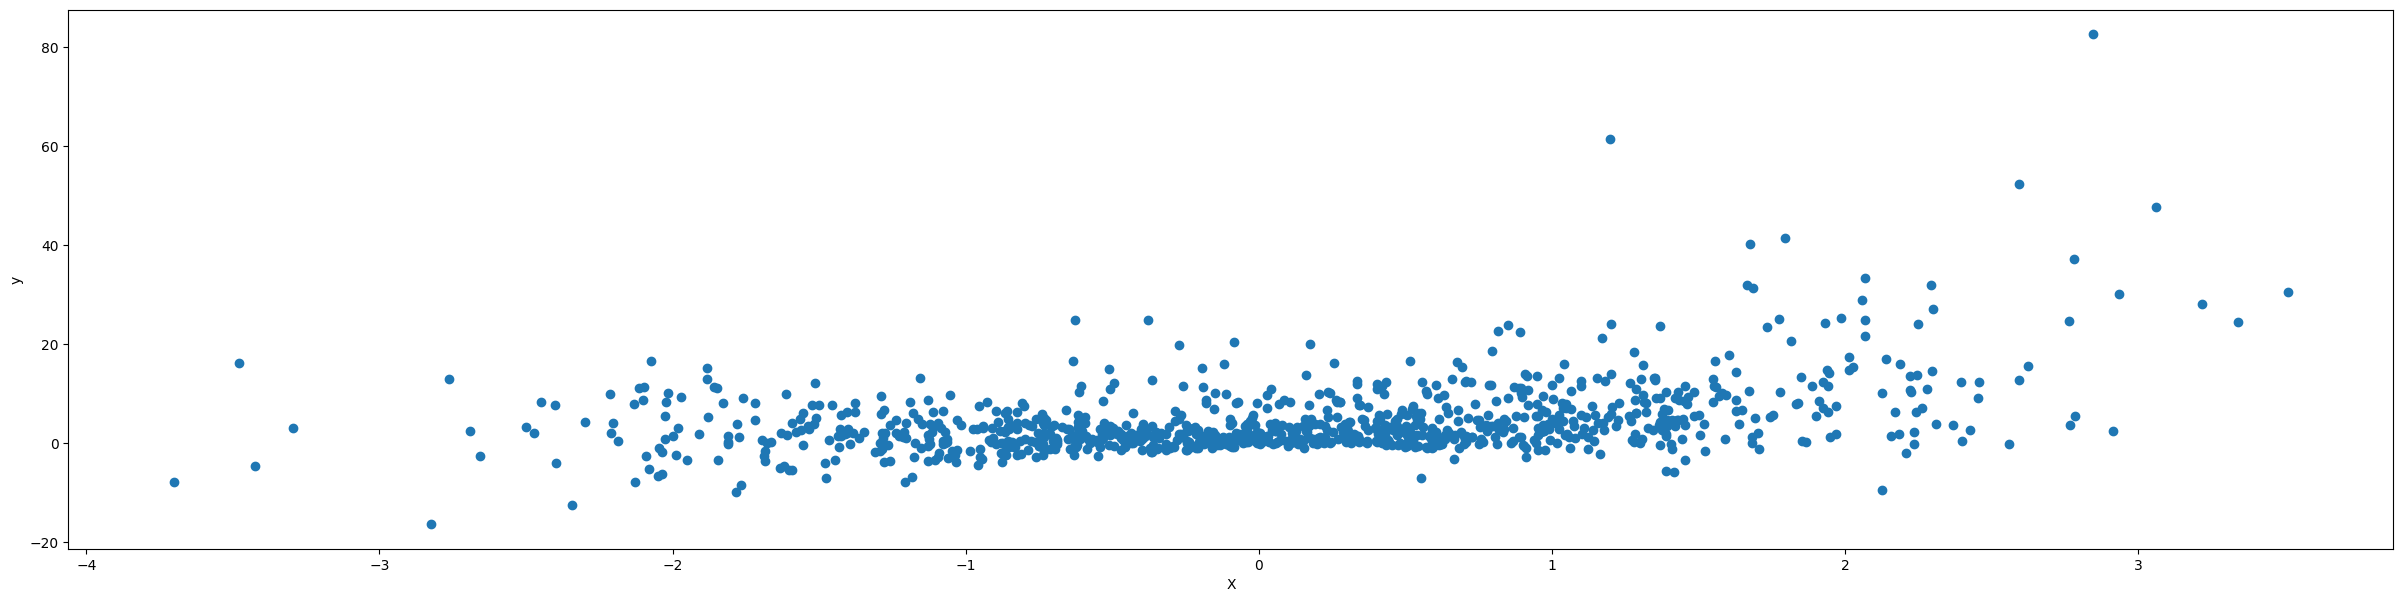

In [1757]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [1758]:
splitter = int(0.8 * len(X))
X_train, X_test = X[:splitter], X[splitter:]
y_train, y_test = y[:splitter], y[splitter:]

print(f"Input Train: {X_train.shape}")
print(f"Input Test: {X_test.shape}")
print(f"Output Train: {y_train.shape}")
print(f"Output Test: {y_test.shape}")

Input Train: (800,)
Input Test: (200,)
Output Train: (800,)
Output Test: (200,)


In [1759]:
X_test=torch.tensor(X_test.values)
y_test=torch.tensor(y_test.values)
X_train=torch.tensor(X_train.values)
y_train=torch.tensor(y_train.values)

In [1760]:
import matplotlib.pyplot as plt

def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

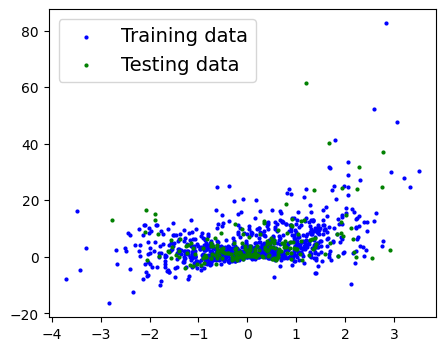

In [1761]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [1762]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [1763]:

model_2 = LinearRegressionModel()
list(model_2.parameters())
divider()
print(model_2.state_dict())

-----------------------------------
OrderedDict([('weights', tensor([-0.2147])), ('bias', tensor([0.2989]))])


In [1764]:
with torch.inference_mode():
    torch.tensor(X_test)
    y_preds = model_2(X_test)

print(f"Values: {y_preds}")

Values: tensor([ 2.2110e-01, -1.1600e-01,  1.1042e-01,  5.2705e-01,  1.6266e-01,
         2.9981e-01,  4.9146e-01,  5.3748e-01, -9.6078e-02,  2.1207e-01,
         7.0306e-01,  4.7599e-01,  4.9453e-01,  1.6295e-01,  2.2742e-01,
         4.5685e-01, -5.5839e-04,  4.3132e-01,  4.6000e-01,  2.9287e-01,
         4.5604e-01,  6.3304e-01,  6.9123e-01,  6.7087e-02,  1.9158e-01,
         1.1266e-01,  1.9043e-01,  2.1883e-01,  5.3642e-01,  4.1302e-01,
         2.7895e-01,  7.3832e-01,  3.9533e-01,  3.8282e-01,  1.4568e-01,
         1.5978e-01,  2.3158e-01,  2.8544e-01,  5.6279e-01,  2.5903e-01,
         1.0848e-01,  1.6562e-01,  1.2764e-01, -1.6664e-01,  3.6220e-01,
         4.0557e-01,  7.6796e-02,  3.2011e-01,  5.6936e-01,  2.8721e-01,
         2.4929e-01,  2.3256e-01,  1.3129e-01,  3.0774e-01,  2.1084e-01,
        -1.3309e-01, -2.9423e-01, -6.1027e-02,  2.1216e-01,  2.4187e-01,
         4.8763e-01, -1.0177e-01,  4.3066e-01,  4.2852e-01,  3.0710e-01,
         2.8919e-01, -1.2384e-01,  5.7386e-

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\1727433743.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X_test)


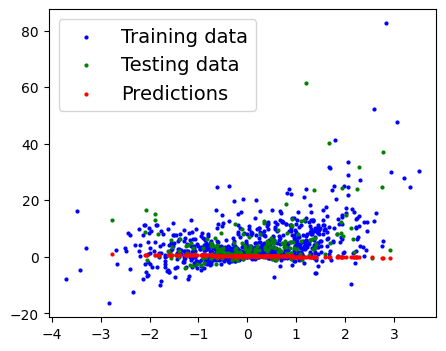

In [1765]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [1766]:
loss_function = nn.L1Loss() # MSE Loss function

In [1767]:
import torch.optim as optim
optimizer = optim.SGD(model_2.parameters(), lr=0.001)

In [1768]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int = 10,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs):
        model.train()
        train_data=torch.tensor(train_data)
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            test_data=torch.tensor(test_data)
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [1769]:
epochs_count, train_loss, test_loss = train(
                                        model_2, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\923240620.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data=torch.tensor(train_data)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\923240620.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data=torch.tensor(test_data)


Epoch 0: MAE Loss: 5.05 | Test Loss: 4.65
Epoch 10: MAE Loss: 5.05 | Test Loss: 4.64
Epoch 20: MAE Loss: 5.04 | Test Loss: 4.64
Epoch 30: MAE Loss: 5.04 | Test Loss: 4.64
Epoch 40: MAE Loss: 5.04 | Test Loss: 4.63
Epoch 50: MAE Loss: 5.03 | Test Loss: 4.63
Epoch 60: MAE Loss: 5.03 | Test Loss: 4.63
Epoch 70: MAE Loss: 5.03 | Test Loss: 4.62
Epoch 80: MAE Loss: 5.02 | Test Loss: 4.62
Epoch 90: MAE Loss: 5.02 | Test Loss: 4.62
Epoch 100: MAE Loss: 5.02 | Test Loss: 4.61
Epoch 110: MAE Loss: 5.01 | Test Loss: 4.61
Epoch 120: MAE Loss: 5.01 | Test Loss: 4.61
Epoch 130: MAE Loss: 5.01 | Test Loss: 4.60
Epoch 140: MAE Loss: 5.00 | Test Loss: 4.60
Epoch 150: MAE Loss: 5.00 | Test Loss: 4.60
Epoch 160: MAE Loss: 5.00 | Test Loss: 4.59
Epoch 170: MAE Loss: 4.99 | Test Loss: 4.59
Epoch 180: MAE Loss: 4.99 | Test Loss: 4.59
Epoch 190: MAE Loss: 4.99 | Test Loss: 4.58
Epoch 200: MAE Loss: 4.98 | Test Loss: 4.58
Epoch 210: MAE Loss: 4.98 | Test Loss: 4.58
Epoch 220: MAE Loss: 4.98 | Test Loss: 4.57

In [1770]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

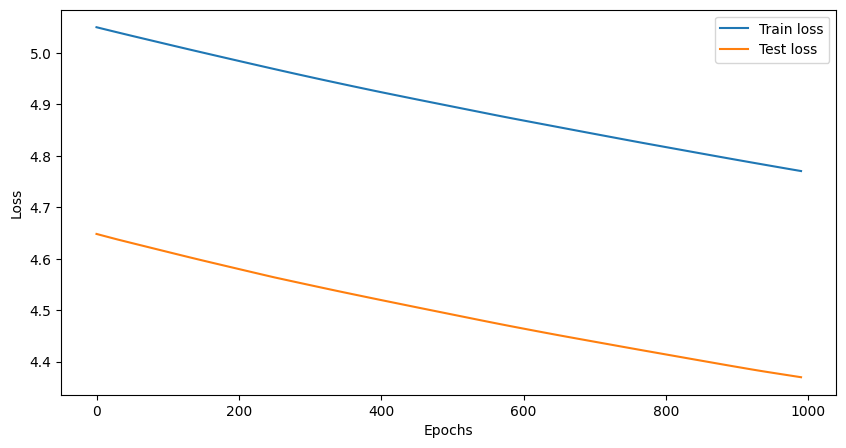

In [1771]:
plot_stats(epochs_count, train_loss, test_loss)

In [1772]:
def predict(model_2, X):
    with torch.inference_mode():
        y_preds = model_2(X)
        return y_preds

In [1773]:
y_preds = predict(model_2, X_test)
y_preds

tensor([0.7699, 0.8897, 0.8093, 0.6613, 0.7907, 0.7420, 0.6739, 0.6576, 0.8826,
        0.7731, 0.5988, 0.6794, 0.6728, 0.7906, 0.7677, 0.6862, 0.8487, 0.6953,
        0.6851, 0.7444, 0.6865, 0.6236, 0.6030, 0.8246, 0.7804, 0.8085, 0.7808,
        0.7707, 0.6579, 0.7018, 0.7494, 0.5862, 0.7081, 0.7125, 0.7967, 0.7917,
        0.7662, 0.7471, 0.6486, 0.7565, 0.8099, 0.7896, 0.8031, 0.9077, 0.7198,
        0.7044, 0.8212, 0.7348, 0.6462, 0.7465, 0.7599, 0.7659, 0.8018, 0.7392,
        0.7736, 0.8957, 0.9530, 0.8701, 0.7731, 0.7626, 0.6753, 0.8846, 0.6955,
        0.6963, 0.7394, 0.7458, 0.8925, 0.6446, 0.9644, 0.5315, 0.7548, 0.7037,
        0.6179, 0.7510, 0.6926, 0.9087, 0.6752, 0.7997, 0.6042, 0.6526, 0.5988,
        0.7226, 0.6952, 0.7009, 0.6250, 0.7163, 0.6371, 0.6891, 0.8104, 0.8143,
        0.8302, 0.8393, 0.7802, 0.6537, 0.9139, 0.8449, 0.7752, 0.7413, 0.8891,
        0.8121, 0.8111, 0.8466, 0.7740, 0.7242, 0.7033, 0.5820, 0.7435, 0.7782,
        0.8122, 0.7991, 0.7467, 0.7903, 

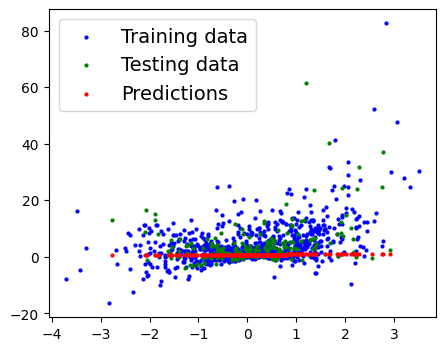

In [1774]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [1775]:
data_copy = data.copy()
X = data_copy['x3']
y = data_copy['y']

In [1776]:
print(X)

0      0.867185
1      0.353789
2      0.284455
3      0.472880
4      0.014656
         ...   
995   -0.285002
996   -0.029521
997   -0.723684
998   -1.654938
999    0.735014
Name: x3, Length: 1000, dtype: float64


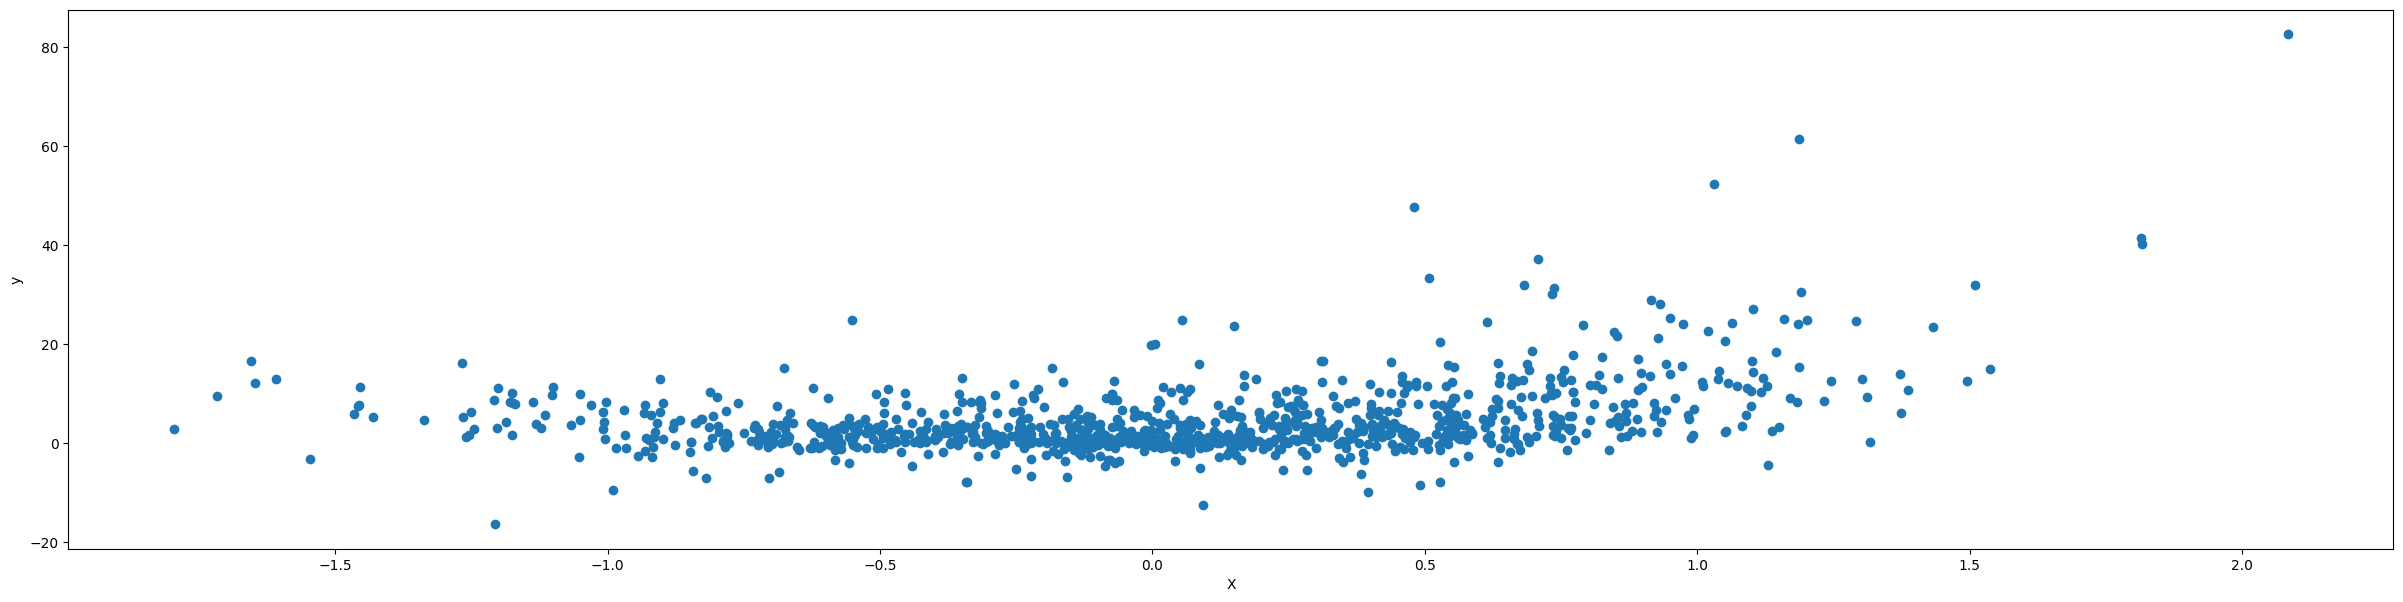

In [1777]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [1778]:
splitter = int(0.8 * len(X))
X_train, X_test = X[:splitter], X[splitter:]
y_train, y_test = y[:splitter], y[splitter:]

print(f"Input Train: {X_train.shape}")
print(f"Input Test: {X_test.shape}")
print(f"Output Train: {y_train.shape}")
print(f"Output Test: {y_test.shape}")

Input Train: (800,)
Input Test: (200,)
Output Train: (800,)
Output Test: (200,)


In [1779]:
X_test=torch.tensor(X_test.values)
y_test=torch.tensor(y_test.values)
X_train=torch.tensor(X_train.values)
y_train=torch.tensor(y_train.values)

In [1780]:
import matplotlib.pyplot as plt

def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

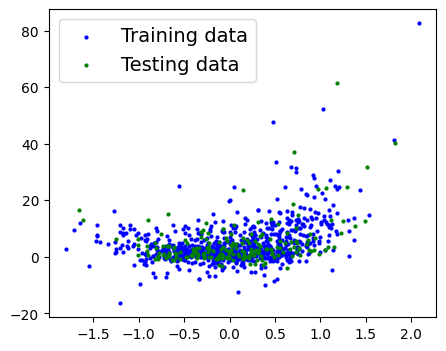

In [1781]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [1782]:
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [1783]:
model_3 = LinearRegressionModel()
list(model_3.parameters())
divider()
print(model.state_dict())

-----------------------------------
OrderedDict([('weights', tensor([1.1557])), ('bias', tensor([0.6090]))])


In [1784]:
with torch.inference_mode():
    y_preds = model_3(X_test)

print(f"Values: {y_preds}")

Values: tensor([-1.2466, -1.2606, -1.2564, -1.2460, -1.2519, -1.2517, -1.2417, -1.2455,
        -1.2586, -1.2588, -1.2320, -1.2358, -1.2466, -1.2509, -1.2625, -1.2489,
        -1.2593, -1.2405, -1.2483, -1.2458, -1.2429, -1.2439, -1.2410, -1.2501,
        -1.2568, -1.2551, -1.2551, -1.2536, -1.2483, -1.2466, -1.2529, -1.2426,
        -1.2461, -1.2491, -1.2507, -1.2492, -1.2545, -1.2447, -1.2428, -1.2396,
        -1.2497, -1.2440, -1.2548, -1.2464, -1.2476, -1.2426, -1.2530, -1.2557,
        -1.2419, -1.2420, -1.2523, -1.2484, -1.2489, -1.2541, -1.2521, -1.2573,
        -1.2630, -1.2686, -1.2583, -1.2517, -1.2533, -1.2515, -1.2492, -1.2522,
        -1.2566, -1.2493, -1.2528, -1.2560, -1.2488, -1.2395, -1.2394, -1.2433,
        -1.2473, -1.2598, -1.2384, -1.2554, -1.2490, -1.2615, -1.2479, -1.2531,
        -1.2419, -1.2420, -1.2384, -1.2467, -1.2427, -1.2483, -1.2384, -1.2414,
        -1.2517, -1.2479, -1.2612, -1.2520, -1.2408, -1.2441, -1.2596, -1.2481,
        -1.2586, -1.2407, -1.252

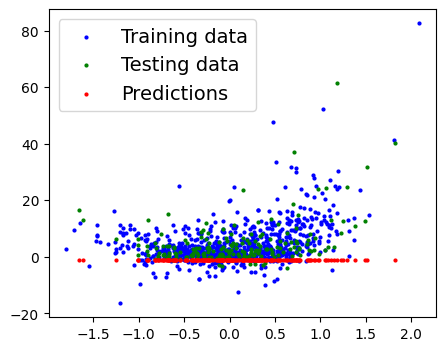

In [1785]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [1786]:
loss_function = nn.L1Loss() # MSE Loss function

In [1787]:
import torch.optim as optim
optimizer = optim.SGD(model_3.parameters(), lr=0.001)

In [1788]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int = 10,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [1789]:
epochs_count, train_loss, test_loss = train(
                                        model_3, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=10000
                                    )

Epoch 0: MAE Loss: 6.05 | Test Loss: 5.79
Epoch 10: MAE Loss: 6.05 | Test Loss: 5.78
Epoch 20: MAE Loss: 6.04 | Test Loss: 5.77
Epoch 30: MAE Loss: 6.03 | Test Loss: 5.76
Epoch 40: MAE Loss: 6.03 | Test Loss: 5.76
Epoch 50: MAE Loss: 6.02 | Test Loss: 5.75
Epoch 60: MAE Loss: 6.02 | Test Loss: 5.74
Epoch 70: MAE Loss: 6.01 | Test Loss: 5.73
Epoch 80: MAE Loss: 6.00 | Test Loss: 5.73
Epoch 90: MAE Loss: 6.00 | Test Loss: 5.72
Epoch 100: MAE Loss: 5.99 | Test Loss: 5.71
Epoch 110: MAE Loss: 5.98 | Test Loss: 5.70
Epoch 120: MAE Loss: 5.98 | Test Loss: 5.70
Epoch 130: MAE Loss: 5.97 | Test Loss: 5.69
Epoch 140: MAE Loss: 5.96 | Test Loss: 5.68
Epoch 150: MAE Loss: 5.96 | Test Loss: 5.68
Epoch 160: MAE Loss: 5.95 | Test Loss: 5.67
Epoch 170: MAE Loss: 5.94 | Test Loss: 5.66
Epoch 180: MAE Loss: 5.94 | Test Loss: 5.65
Epoch 190: MAE Loss: 5.93 | Test Loss: 5.65
Epoch 200: MAE Loss: 5.93 | Test Loss: 5.64
Epoch 210: MAE Loss: 5.92 | Test Loss: 5.63
Epoch 220: MAE Loss: 5.91 | Test Loss: 5.62

In [1790]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

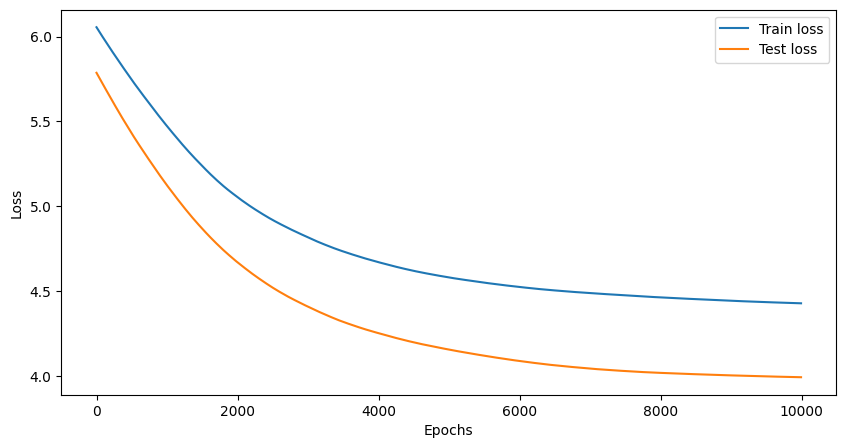

In [1791]:
plot_stats(epochs_count, train_loss, test_loss)

In [1792]:
def predict(model, X):
    with torch.inference_mode():
        y_preds = model(X)
        return y_preds

In [1793]:
y_preds = predict(model_3, X_test)
y_preds

tensor([1.8985, 2.8072, 2.5393, 1.8623, 2.2465, 2.2313, 1.5806, 1.8299, 2.6810,
        2.6907, 0.9468, 1.1961, 1.8961, 2.1775, 2.9337, 2.0460, 2.7232, 1.5006,
        2.0097, 1.8476, 1.6594, 1.7240, 1.5376, 2.1292, 2.5613, 2.4502, 2.4551,
        2.3578, 2.0128, 1.9005, 2.3093, 1.6404, 1.8690, 2.0639, 2.1642, 2.0655,
        2.4109, 1.7770, 1.6498, 1.4409, 2.1022, 1.7317, 2.4335, 1.8887, 1.9647,
        1.6399, 2.3168, 2.4896, 1.5912, 1.5998, 2.2673, 2.0186, 2.0509, 2.3865,
        2.2585, 2.5930, 2.9662, 3.3321, 2.6586, 2.2301, 2.3354, 2.2158, 2.0661,
        2.2611, 2.5486, 2.0764, 2.3020, 2.5091, 2.0399, 1.4381, 1.4313, 1.6872,
        1.9434, 2.7554, 1.3676, 2.4747, 2.0524, 2.8682, 1.9854, 2.3199, 1.5962,
        1.6027, 1.3654, 1.9087, 1.6423, 2.0127, 1.3652, 1.5592, 2.2314, 1.9838,
        2.8476, 2.2531, 1.5211, 1.7386, 2.7446, 1.9996, 2.6799, 1.5181, 2.2839,
        2.3856, 1.4986, 2.1709, 1.5966, 1.8744, 1.8708, 1.8467, 1.8226, 2.0200,
        3.0327, 2.1143, 2.7997, 1.8662, 

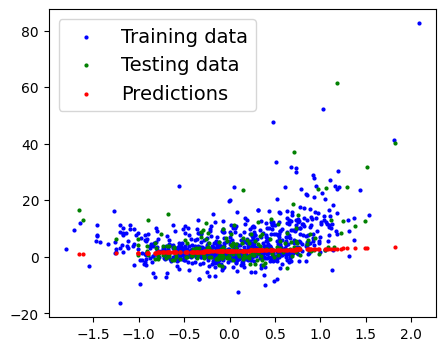

In [1794]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [1795]:
data_copy = data.copy()
X = data_copy['x4']
y = data_copy['y']
print(X)

0      0.905457
1     -0.368996
2     -0.276847
3      1.260798
4      0.323378
         ...   
995    1.348053
996    2.466935
997   -0.027019
998    0.863903
999   -0.873065
Name: x4, Length: 1000, dtype: float64


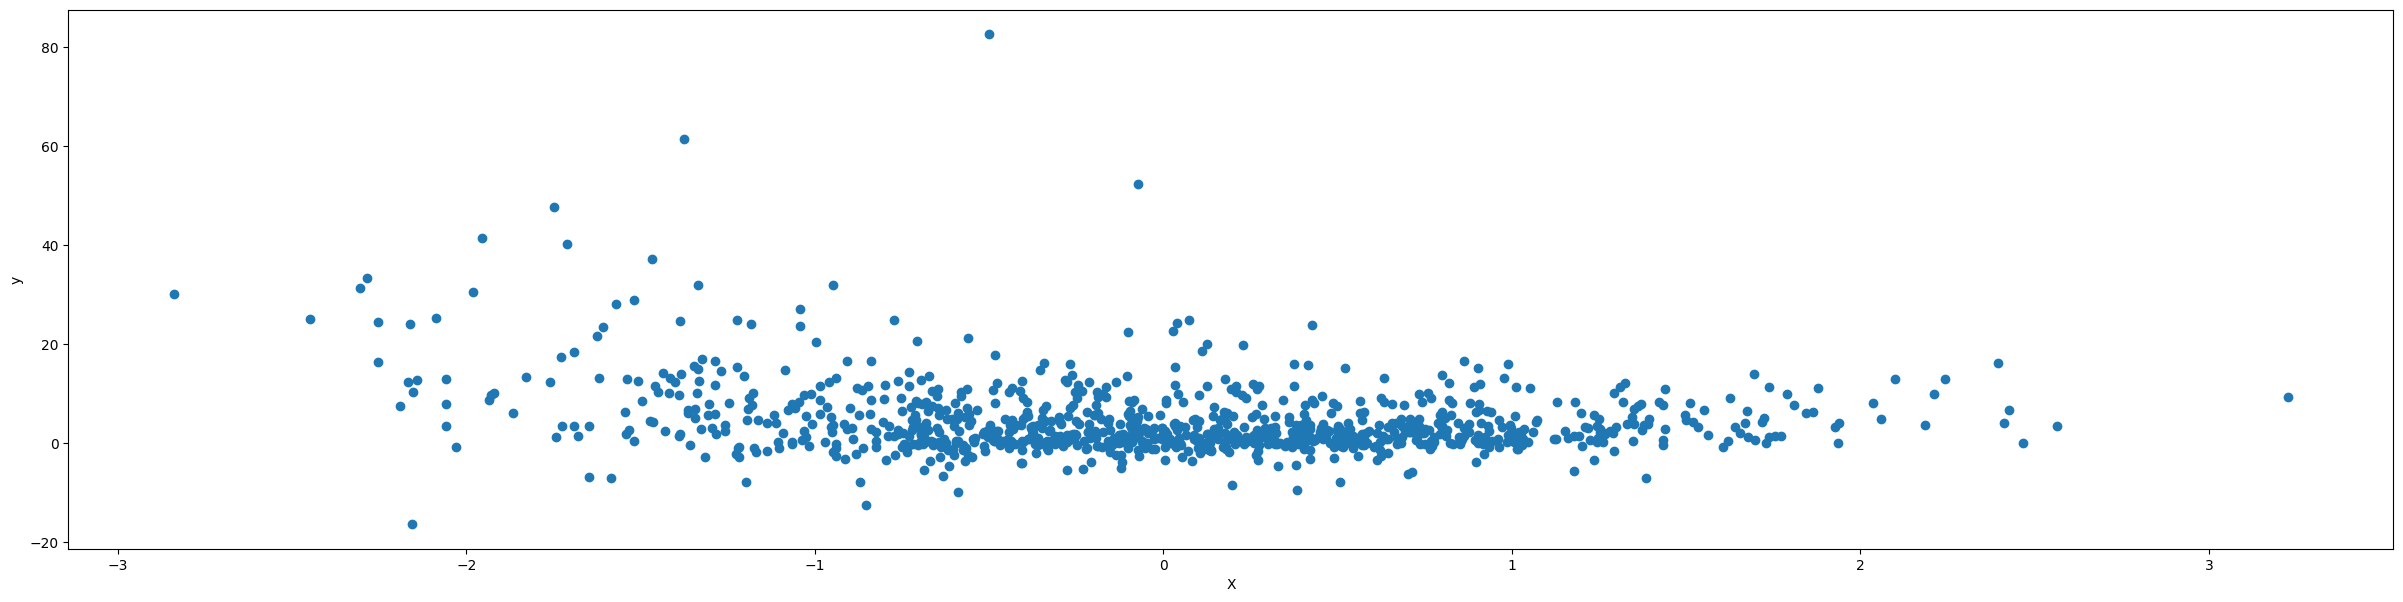

In [1796]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [1797]:
splitter = int(0.8 * len(X))
X_train, X_test = X[:splitter], X[splitter:]
y_train, y_test = y[:splitter], y[splitter:]

print(f"Input Train: {X_train.shape}")
print(f"Input Test: {X_test.shape}")
print(f"Output Train: {y_train.shape}")
print(f"Output Test: {y_test.shape}")

Input Train: (800,)
Input Test: (200,)
Output Train: (800,)
Output Test: (200,)


In [1798]:
X_test=torch.tensor(X_test.values)
y_test=torch.tensor(y_test.values)
X_train=torch.tensor(X_train.values)
y_train=torch.tensor(y_train.values)

In [1799]:
import matplotlib.pyplot as plt

def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

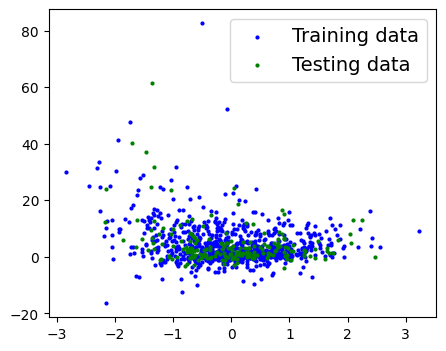

In [1800]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [1801]:
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [1802]:
model_4 = LinearRegressionModel()
list(model_4.parameters())
divider()
print(model_4.state_dict())

-----------------------------------
OrderedDict([('weights', tensor([-1.2284])), ('bias', tensor([0.5294]))])


In [1803]:
with torch.inference_mode():
    y_preds = model_4(X_test)

print(f"Values: {y_preds}")

Values: tensor([ 0.9885,  0.4831,  0.1377,  0.2002, -0.6493,  1.4635,  1.4123, -1.4860,
         1.3931,  1.3215, -2.0479, -0.5741,  0.1500,  1.3822,  1.4636,  0.0551,
         1.2954, -0.6637,  0.0991,  1.3244,  0.5326, -1.7349, -1.9703,  0.7675,
        -0.0845,  1.3865, -1.3097,  0.7190,  1.5084, -0.1625,  0.8800,  0.7208,
        -0.2460, -1.5298,  0.6283,  1.4490,  0.2046, -0.2356,  0.2137,  0.3366,
         1.6091,  1.8392,  1.4950,  2.4257,  1.7789,  0.1696,  2.0589,  0.7492,
        -0.2314,  0.4901,  0.9909,  1.0949,  1.4064, -0.1243,  0.5406,  0.9658,
         2.2323,  2.6311,  0.7293,  1.8143,  0.4014, -0.9994,  0.8424, -1.5019,
         1.8388, -0.4063,  1.3458, -0.5738,  2.2860, -2.2269, -0.7737,  0.4230,
        -1.0193,  1.1168,  1.3011,  0.3722,  1.3918, -0.2608, -0.6062,  0.4637,
        -0.5809,  0.6906, -0.7835, -1.2382, -0.6144,  0.3627, -0.4524,  0.0398,
         0.2831,  0.2825,  2.5175, -0.3598,  0.5226, -2.0001,  3.1853,  1.4141,
         1.2497,  1.3469,  3.191

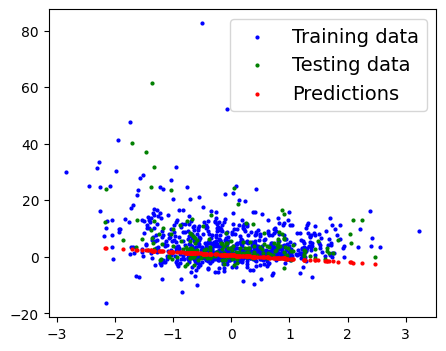

In [1804]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [1805]:
loss_function = nn.L1Loss() # MSE Loss function

In [1806]:
import torch.optim as optim
optimizer = optim.SGD(model_4.parameters(), lr=0.001)

In [1807]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int = 10,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [1808]:
epochs_count, train_loss, test_loss = train(
                                        model_4, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 4.95 | Test Loss: 4.56
Epoch 10: MAE Loss: 4.95 | Test Loss: 4.56
Epoch 20: MAE Loss: 4.95 | Test Loss: 4.56
Epoch 30: MAE Loss: 4.95 | Test Loss: 4.56
Epoch 40: MAE Loss: 4.95 | Test Loss: 4.55
Epoch 50: MAE Loss: 4.94 | Test Loss: 4.55
Epoch 60: MAE Loss: 4.94 | Test Loss: 4.55
Epoch 70: MAE Loss: 4.94 | Test Loss: 4.55
Epoch 80: MAE Loss: 4.94 | Test Loss: 4.54
Epoch 90: MAE Loss: 4.93 | Test Loss: 4.54
Epoch 100: MAE Loss: 4.93 | Test Loss: 4.54
Epoch 110: MAE Loss: 4.93 | Test Loss: 4.54
Epoch 120: MAE Loss: 4.93 | Test Loss: 4.53
Epoch 130: MAE Loss: 4.92 | Test Loss: 4.53
Epoch 140: MAE Loss: 4.92 | Test Loss: 4.53
Epoch 150: MAE Loss: 4.92 | Test Loss: 4.53
Epoch 160: MAE Loss: 4.92 | Test Loss: 4.52
Epoch 170: MAE Loss: 4.92 | Test Loss: 4.52
Epoch 180: MAE Loss: 4.91 | Test Loss: 4.52
Epoch 190: MAE Loss: 4.91 | Test Loss: 4.52
Epoch 200: MAE Loss: 4.91 | Test Loss: 4.51
Epoch 210: MAE Loss: 4.91 | Test Loss: 4.51
Epoch 220: MAE Loss: 4.90 | Test Loss: 4.51

In [1809]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

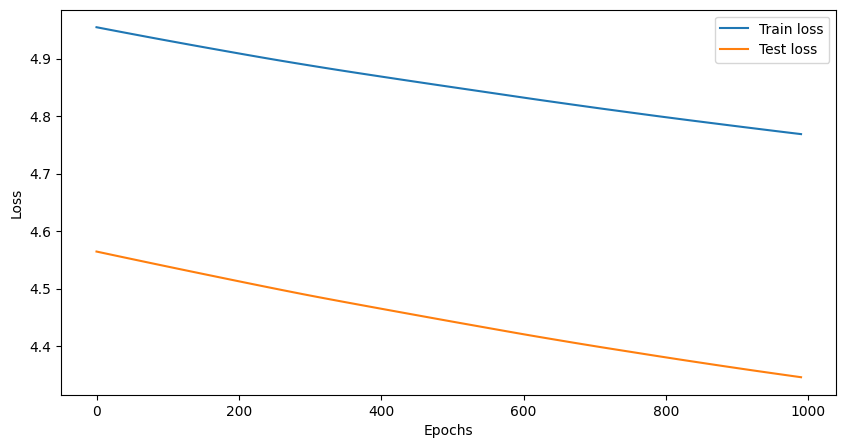

In [1810]:
plot_stats(epochs_count, train_loss, test_loss)

In [1811]:
def predict(model, X):
    with torch.inference_mode():
        y_preds = model(X)
        return y_preds

In [1812]:
y_preds = predict(model_4, X_test)
y_preds

tensor([ 1.3663e+00,  9.0532e-01,  5.9032e-01,  6.4728e-01, -1.2746e-01,
         1.7994e+00,  1.7527e+00, -8.9054e-01,  1.7352e+00,  1.6700e+00,
        -1.4030e+00, -5.8856e-02,  6.0153e-01,  1.7253e+00,  1.7995e+00,
         5.1502e-01,  1.6462e+00, -1.4052e-01,  5.5509e-01,  1.6726e+00,
         9.5045e-01, -1.1175e+00, -1.3322e+00,  1.1647e+00,  3.8768e-01,
         1.7292e+00, -7.2971e-01,  1.1205e+00,  1.8404e+00,  3.1656e-01,
         1.2673e+00,  1.1221e+00,  2.4041e-01, -9.3044e-01,  1.0377e+00,
         1.7862e+00,  6.5134e-01,  2.4985e-01,  6.5959e-01,  7.7171e-01,
         1.9323e+00,  2.1421e+00,  1.8282e+00,  2.6770e+00,  2.0871e+00,
         6.1941e-01,  2.3425e+00,  1.1480e+00,  2.5367e-01,  9.1174e-01,
         1.3685e+00,  1.4633e+00,  1.7474e+00,  3.5141e-01,  9.5772e-01,
         1.3456e+00,  2.5006e+00,  2.8643e+00,  1.1298e+00,  2.1194e+00,
         8.3080e-01, -4.4676e-01,  1.2330e+00, -9.0497e-01,  2.1417e+00,
         9.4167e-02,  1.6921e+00, -5.8568e-02,  2.5

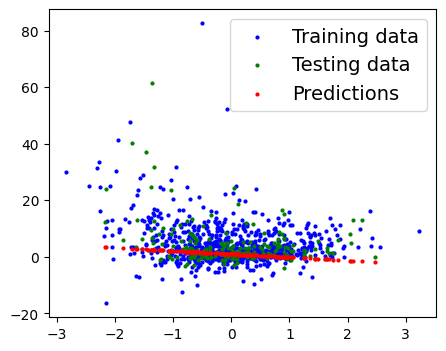

In [1813]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [1814]:
data_copy = data.copy()
X = data_copy['x5']
y = data_copy['y']
print(X)

0     -0.564753
1      0.484929
2     -1.421414
3      0.589971
4      0.425665
         ...   
995   -0.386241
996    1.239812
997    0.477223
998    0.903119
999   -0.275252
Name: x5, Length: 1000, dtype: float64


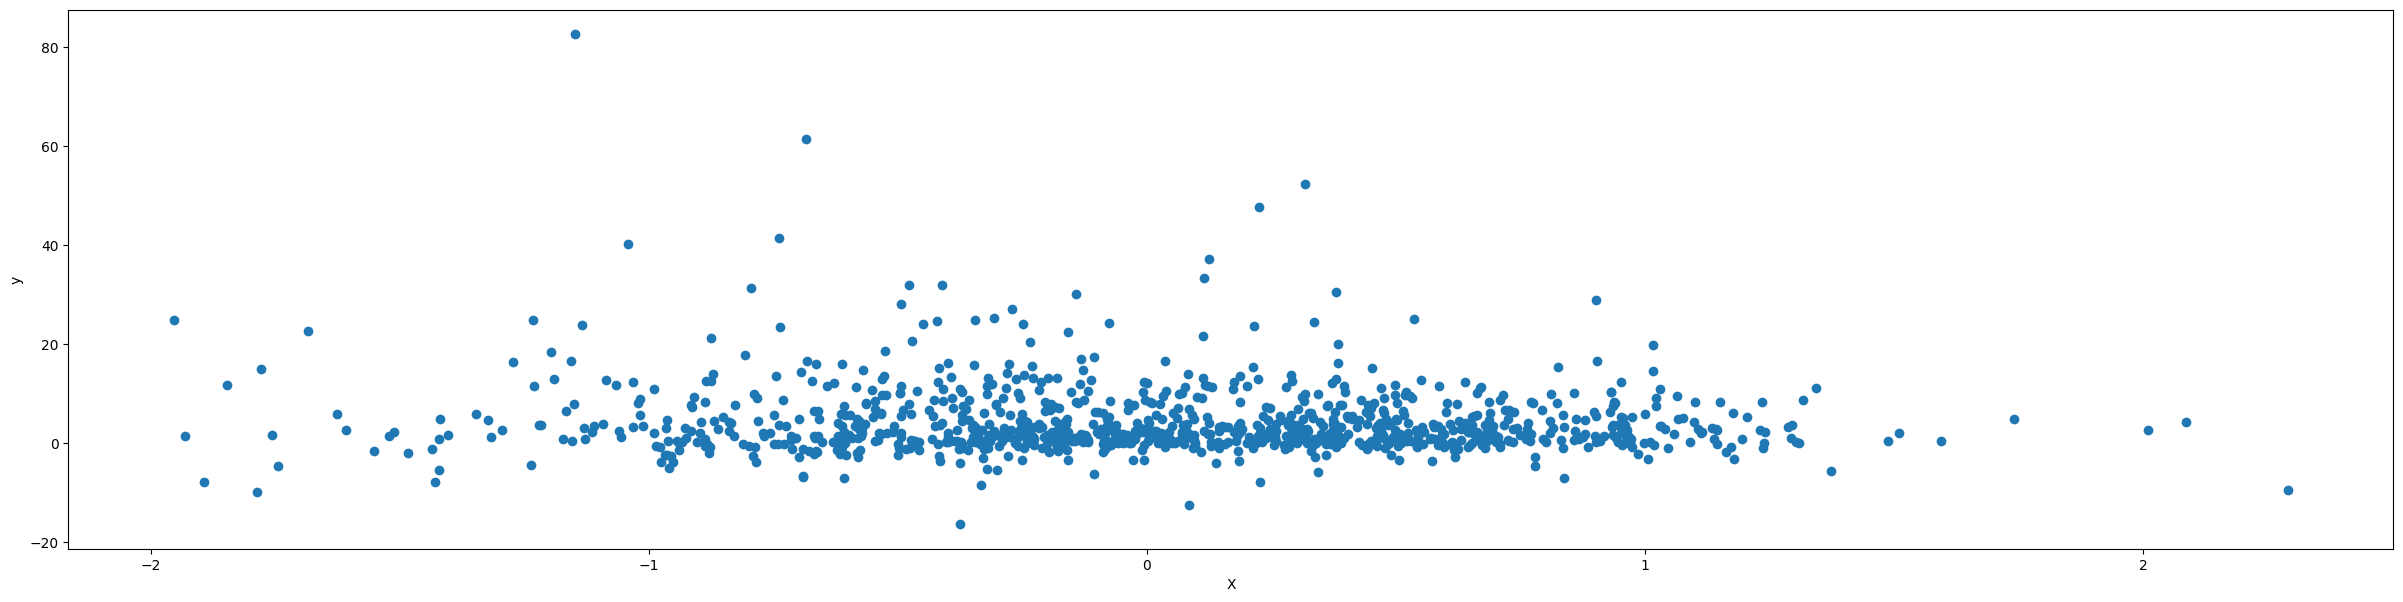

In [1815]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [1816]:
splitter = int(0.8 * len(X))
X_train, X_test = X[:splitter], X[splitter:]
y_train, y_test = y[:splitter], y[splitter:]

print(f"Input Train: {X_train.shape}")
print(f"Input Test: {X_test.shape}")
print(f"Output Train: {y_train.shape}")
print(f"Output Test: {y_test.shape}")

Input Train: (800,)
Input Test: (200,)
Output Train: (800,)
Output Test: (200,)


In [1817]:
X_test=torch.tensor(X_test.values)
y_test=torch.tensor(y_test.values)
X_train=torch.tensor(X_train.values)
y_train=torch.tensor(y_train.values)

In [1818]:
import matplotlib.pyplot as plt

def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

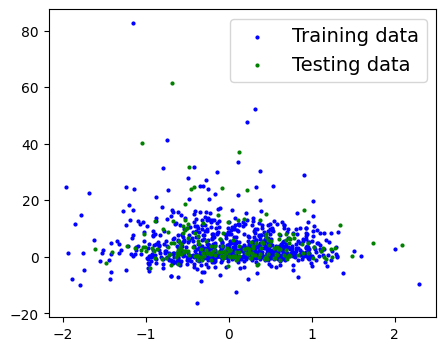

In [1819]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [1820]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [1821]:
model_5 = LinearRegressionModel()
list(model_5.parameters())
divider()
print(model_5.state_dict())

-----------------------------------
OrderedDict([('weights', tensor([1.2211])), ('bias', tensor([0.1511]))])


In [1822]:
with torch.inference_mode():
    y_preds = model_5(X_test)

print(f"Values: {y_preds}")

Values: tensor([ 0.8648,  0.0594,  0.6423, -0.1257,  0.0879, -0.0107,  0.6929,  0.6279,
        -1.0952,  0.0788,  0.6152,  1.0510,  1.5354, -1.5624, -0.9306, -0.7623,
        -0.4461,  1.7226,  0.2692,  0.6995, -0.1008,  0.7336,  1.0973,  0.6092,
        -1.0837, -0.9813,  0.7819,  0.9011,  0.1436, -0.5158, -0.2038, -0.2389,
         0.4934, -0.1653,  0.5591, -1.0571,  0.7044,  1.0484, -0.6072,  0.8580,
         1.7920,  0.6011, -0.3672,  0.0305, -0.8253,  0.4286,  0.7084, -0.7018,
        -1.3397,  0.0552, -0.0628,  0.0459, -0.3017, -0.9005, -0.5757, -0.0047,
        -0.3624, -1.1210, -0.5535,  0.9909, -1.6592,  0.3073, -0.4996, -0.9441,
        -0.3033, -0.1814, -0.2991, -1.0116,  0.9977, -0.4969,  1.5120, -0.5789,
        -0.4526, -0.5562,  0.5034,  0.3004,  0.2126, -1.1098, -0.3411,  0.5644,
         0.7030,  0.1178,  2.6980,  0.8721, -0.7337,  0.4422,  0.0238,  0.5108,
         0.4026,  0.4775,  0.2897,  1.1657,  0.2690,  0.6543, -0.3987,  1.6547,
         0.1742,  0.1546,  0.143

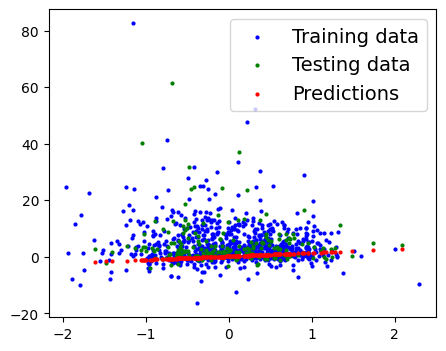

In [1823]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [1824]:
loss_function = nn.L1Loss() # MSE Loss function

In [1825]:
import torch.optim as optim
optimizer = optim.SGD(model_5.parameters(), lr=0.001)

In [1826]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int = 10,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [1827]:
epochs_count, train_loss, test_loss = train(
                                        model_5, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 5.08 | Test Loss: 4.78
Epoch 10: MAE Loss: 5.07 | Test Loss: 4.77
Epoch 20: MAE Loss: 5.07 | Test Loss: 4.77
Epoch 30: MAE Loss: 5.07 | Test Loss: 4.77
Epoch 40: MAE Loss: 5.07 | Test Loss: 4.77
Epoch 50: MAE Loss: 5.06 | Test Loss: 4.76
Epoch 60: MAE Loss: 5.06 | Test Loss: 4.76
Epoch 70: MAE Loss: 5.06 | Test Loss: 4.76
Epoch 80: MAE Loss: 5.05 | Test Loss: 4.75
Epoch 90: MAE Loss: 5.05 | Test Loss: 4.75
Epoch 100: MAE Loss: 5.05 | Test Loss: 4.75
Epoch 110: MAE Loss: 5.05 | Test Loss: 4.74
Epoch 120: MAE Loss: 5.04 | Test Loss: 4.74
Epoch 130: MAE Loss: 5.04 | Test Loss: 4.74
Epoch 140: MAE Loss: 5.04 | Test Loss: 4.74
Epoch 150: MAE Loss: 5.04 | Test Loss: 4.73
Epoch 160: MAE Loss: 5.03 | Test Loss: 4.73
Epoch 170: MAE Loss: 5.03 | Test Loss: 4.73
Epoch 180: MAE Loss: 5.03 | Test Loss: 4.72
Epoch 190: MAE Loss: 5.03 | Test Loss: 4.72
Epoch 200: MAE Loss: 5.02 | Test Loss: 4.72
Epoch 210: MAE Loss: 5.02 | Test Loss: 4.72
Epoch 220: MAE Loss: 5.02 | Test Loss: 4.71

In [1828]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

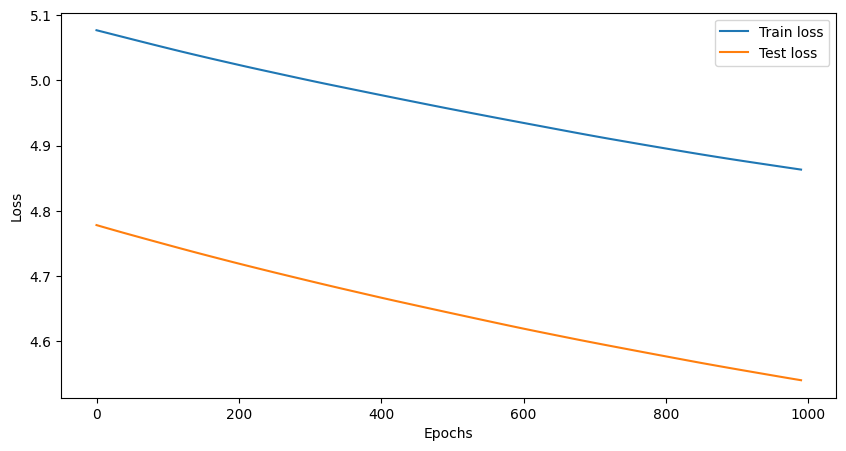

In [1829]:
plot_stats(epochs_count, train_loss, test_loss)

In [1830]:
def predict(model, X):
    with torch.inference_mode():
        y_preds = model(X)
        return y_preds

In [1831]:
y_preds = predict(model_5, X_test)
y_preds

tensor([ 1.2844e+00,  5.2223e-01,  1.0738e+00,  3.4706e-01,  5.4918e-01,
         4.5587e-01,  1.1217e+00,  1.0602e+00, -5.7054e-01,  5.4058e-01,
         1.0482e+00,  1.4606e+00,  1.9191e+00, -1.0127e+00, -4.1475e-01,
        -2.5546e-01,  4.3806e-02,  2.0963e+00,  7.2080e-01,  1.1280e+00,
         3.7054e-01,  1.1603e+00,  1.5044e+00,  1.0426e+00, -5.5966e-01,
        -4.6270e-01,  1.2060e+00,  1.3188e+00,  6.0192e-01, -2.2165e-02,
         2.7315e-01,  2.3988e-01,  9.3293e-01,  3.0957e-01,  9.9509e-01,
        -5.3445e-01,  1.1327e+00,  1.4582e+00, -1.0871e-01,  1.2780e+00,
         2.1619e+00,  1.0349e+00,  1.1845e-01,  4.9481e-01, -3.1512e-01,
         8.7162e-01,  1.1364e+00, -1.9825e-01, -8.0194e-01,  5.1820e-01,
         4.0658e-01,  5.0938e-01,  1.8049e-01, -3.8621e-01, -7.8894e-02,
         4.6152e-01,  1.2300e-01, -5.9492e-01, -5.7887e-02,  1.4037e+00,
        -1.1043e+00,  7.5677e-01, -6.8175e-03, -4.2753e-01,  1.7894e-01,
         2.9426e-01,  1.8292e-01, -4.9142e-01,  1.4

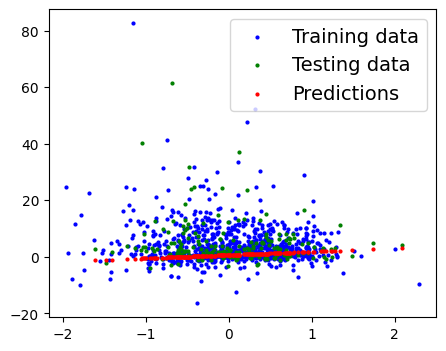

In [1832]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)